E-Commerce Sales Data Analysis

PART 1 - Data Preprocessing:
- Loading the Dataset
- Cleaning the Dataset
- Data Transformation

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector
import seaborn as sns

Loading and Analyzing the Raw Data

In [122]:
df = pd.read_csv('/home/user/Desktop/E-commerce Data-Analysis/amazon.csv')
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [123]:
# Gives an Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [124]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B083342NKJ,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


Dataset Overview:

- Our Dataset has 16 columns and 1465 columns
- All Columns are stored as Object type, Including numeric data.
- rating_count Column has 2 missing values.
- product_name, about_product, review_title and review_content columns seem lengthy.
- Some users and reviews might be duplicated.
- Category Column has 211 unique values, meaning products belong to 211 categories.

In [125]:
# Filled the missing values with 0, I assumed that missing means no rating.
df['rating_count'] = df['rating_count'].fillna(0)

Cleaning the Dataset

In [126]:
# I converted the columns to strings to avoid errors when using the str function
# Removed unwanted symbols and converted them to float.
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '').astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')  # Convert rating safely
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '').astype(float)

In [127]:
# Verified the column types to ensure numerical columns were converted correctly.
print(df.dtypes)

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object


In [128]:
# Checked the length of text in long text columns to decide on how to shorten
df[['product_name', 'about_product', 'review_title', 'review_content']].applymap(lambda x: len(str(x)))

/tmp/ipykernel_52973/3850513996.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['product_name', 'about_product', 'review_title', 'review_content']].applymap(lambda x: len(str(x)))


,product_name,about_product,review_title,review_content
0,162,960,124,483
1,193,605,181,1186
2,136,1091,137,271
3,199,699,140,443
4,110,574,138,2451
...,...,...,...,...
1460,183,423,154,479
1461,55,28,328,1036
1462,78,297,118,880
1463,54,528,95,388


In [129]:
# Trimmed the long texts keeping it short and readable.
df['product_name'] = df['product_name'].str.slice(0, 50)
df['about_product'] = df['about_product'].str.slice(0, 100)
df['review_title'] = df['review_title'].str.slice(0, 50)
df['review_content'] = df['review_content'].str.slice(0, 100)

In [130]:
# Count unique values in each column
# Most Columns have unique values, so no encoding needed.
df.nunique()

product_id             1351
product_name           1289
category                211
discounted_price        550
actual_price            449
discount_percentage      92
rating                   25
rating_count           1144
about_product          1190
user_id                1194
user_name              1194
review_id              1194
review_title           1187
review_content         1189
img_link               1412
product_link           1465
dtype: int64

In [131]:
# Checked for Duplicates
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")

Total duplicate rows: 0


In [132]:
# Check for missing values
# Rating Column has 1 missing value
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

rating    1
dtype: int64


In [133]:
# Dropped the row with the missing value
df = df.dropna(subset=['rating'])

In [134]:
# Checking the first 10 rows of the Category Column before extracting main Categories
df['category'].head(10)

0    Computers&Accessories|Accessories&Peripherals|...
1    Computers&Accessories|Accessories&Peripherals|...
2    Computers&Accessories|Accessories&Peripherals|...
3    Computers&Accessories|Accessories&Peripherals|...
4    Computers&Accessories|Accessories&Peripherals|...
5    Computers&Accessories|Accessories&Peripherals|...
6    Computers&Accessories|Accessories&Peripherals|...
7    Computers&Accessories|Accessories&Peripherals|...
8    Computers&Accessories|NetworkingDevices|Networ...
9    Computers&Accessories|Accessories&Peripherals|...
Name: category, dtype: object

In [135]:
# Extracting only the main category
df['category'] = df['category'].str.split('|').str[0]

# Counting unique values after extracting main categories
df['category'].value_counts()

/tmp/ipykernel_52973/1577017555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = df['category'].str.split('|').str[0]


category
Electronics              526
Computers&Accessories    453
Home&Kitchen             447
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64

In [136]:
# Created a new Column called discount_amount
df['discount_amount'] = df['actual_price'] - df['discounted_price']

/tmp/ipykernel_52973/1411443971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['discount_amount'] = df['actual_price'] - df['discounted_price']


In [137]:
# I checked random 10 rows to check for timestamps
# No timestamp data is available
df[['review_id', 'review_title', 'review_content']].sample(10)  


,review_id,review_title,review_content
504,"R1Y30KU04V3QF4,RK3DSUGKIZT8Z,R3BIG7J6V2JZTU,R1...","Very good product.,Using as a spare cable in c...","Fast charging.,Cable seems to be of good quali..."
247,"R37S13YALMRPGK,R2OU2YTGFEMJHE,R25SDG11W8EAU9,R...","Its ok product not too good not bad,Cheap and ...","Not too good not too bad,If you have the trust..."
434,"R27MK332LTT5KS,R2TN6LNGD4FLYB,RVZJOLWLG5JZ9,R3...","Above average phone,Worth For The Money 💰,Okie...",I purchased the 6/128gb variant.To sum it up ...
244,"R2LH0W21RI2HB3,R2NTYGKM6R1PXH,R2TR5PF6IUMOXH,R...","Good,Good,Good,Mic is not working,Voice not wo...",Ok with that price but has issues with power b...
476,"R35G82LMN1P1V4,R2R9TCZMPRU2,R2IJXSRMFCQGXD,R3A...","Good one,Almost perfect,Go for it,Good product...",Good quality. Can buy if it’s price is below 2...
967,"R113XKB6ZAUQF,R2SOXALV4NB8GQ,RONEN38QVS6OD,R1S...","Good printer but challenging setup,Use friendl...",The Printer is compact and gets the job done. ...
227,"R26Z0O4978YU47,R13WAXAKPL2LIZ,RSOGJ8FAFL4E5,R3...","Good quality but not superb,Good,Good,Not work...","Like ok,Product as specified,Good,,Yes it's ve..."
629,"R1ZFP957X6NEUB,R1V5NJVJMX27HK,R37W2Z08BFVMN2,R...","Worth Buying !,Good one for the offered price,...","I am using this Product from last 12 days, and..."
601,"RW3YCZCKGOBH,R3099XAIXYVYOG,R355B0JH9K3ZSR,RJS...","Good,Overall Good,Decent earphones for the pri...",It has been only 1 month since I have bought t...
1307,"R3K3LMO7VBZ15E,RIMQ7KGAFAY45,R1KDTPUO1RHWGT,RN...","Good quality, plz add 1 syringe with this kit,...","Quality very good, but 1 injection syringe mus..."


PART 2: MySQL Database Integration
- Creating a Mysql Database
- Perfoming SQL Queries for Analysis

In [138]:
# Connecting to MySQL Server
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Change123"
)

cursor = conn.cursor()

In [139]:
# Creating the database ecommerce_db if it doesn't exist
cursor.execute("CREATE DATABASE IF NOT EXISTS ecommerce_db")

# Switching to the database
cursor.execute("USE ecommerce_db")

In [140]:
# I had issues with the table so I Dropped it
cursor.execute("DROP TABLE IF EXISTS products")

In [141]:
# Create the corrected table
create_table_query = """
CREATE TABLE products (
    product_id VARCHAR(255) PRIMARY KEY, 
    product_name VARCHAR(255),
    category VARCHAR(255),
    discounted_price FLOAT,
    actual_price FLOAT,
    discount_percentage FLOAT,
    rating FLOAT,
    rating_count INT,
    about_product TEXT,
    user_id VARCHAR(255),   
    user_name VARCHAR(255),
    review_id VARCHAR(255),
    review_title TEXT,
    review_content TEXT,
    img_link TEXT,
    product_link TEXT,
    discount_amount FLOAT
);
"""

cursor.execute(create_table_query)
conn.commit()

In [142]:
# Defined the SQL Query to Insert data into the products table
sql = """INSERT INTO products (
    product_id, product_name, category, discounted_price, actual_price, 
    discount_percentage, rating, rating_count, about_product, 
    user_id, user_name, review_id, review_title, review_content, img_link, product_link,
    discount_amount
) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"""

In [143]:
# Looping through each row in the dataframe and insert it tinto the database
for _, row in df.iterrows():
    try:
        values = tuple(row)
        print("Inserting row:", values)
        cursor.execute(sql, values)
    except Exception as e:
        print("Error inserting row:", e)
        continue 

Inserting row: ('B07JW9H4J1', 'Wayona Nylon Braided USB to Lightning Fast Chargin', 'Computers&Accessories', 399.0, 1099.0, 64.0, 4.2, 24269.0, 'High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPho', 'AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ', 'Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM', 'R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I', 'Satisfied,Charging is really fast,Value for money,', 'Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satis', 'https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/51UsScvHQNL._SX300_SY300_QL70_FMwebp_.jpg', 'https://www.amazon.in/Wayona-Braided-WN3LG1-

In [144]:
# Getting the 10 most reviewed products.
query = """
SELECT product_name, COUNT(review_id) AS total_reviews
FROM products
GROUP BY product_name
ORDER BY total_reviews DESC
LIMIT 10;
"""

cursor.execute(query)
result = cursor.fetchall()

for row in result:
    print(row)

('Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch w', 5)
('boAt Wave Call Smart Watch, Smart Talk with Advanc', 4)
('Fire-Boltt Phoenix Smart Watch with Bluetooth Call', 3)
('Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Br', 3)
('Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Stor', 3)
('PTron Newly Launched Force X10 Bluetooth Calling S', 3)
('boAt Bassheads 100 in Ear Wired Earphones with Mic', 2)
('Wonderchef Nutri-blend Mixer, Grinder & Blender | ', 2)
('AmazonBasics Double Braided Nylon USB Type-C to Ty', 2)
('AmazonBasics Micro USB Fast Charging Cable for And', 2)


In [145]:
# Getting the category with the highest average rating
query = """
SELECT category, AVG(rating) AS avg_rating
FROM products
GROUP BY category
ORDER BY avg_rating DESC
LIMIT 1;
"""

cursor.execute(query)
result = cursor.fetchall()
print(result)

[('OfficeProducts', 4.309677447042158)]


In [146]:
# Getting the products with more than 50% discount.
query = """
SELECT product_name, discount_percentage
FROM products
WHERE discount_percentage > 50
ORDER BY discount_percentage DESC;
"""

cursor.execute(query)
result = cursor.fetchall()
print(result)

[('rts [2 Pack] Mini USB C Type C Adapter Plug, Type ', 94.0), ('Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch w', 91.0), ('Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch w', 91.0), ('Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch w', 91.0), ('Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch w', 91.0), ('Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch w', 91.0), ('Sounce Spiral Charger Cable Protector Data Cable S', 90.0), ('LAPSTER Spiral Charger Spiral Charger Cable Protec', 90.0), ('Silicone Rubber Earbuds Tips, Eartips, Earpads, Ea', 90.0), ('Sounce Fast Phone Charging Cable & Data Sync USB C', 90.0), ('Sounce Protective Case Cover Compatible Boat Xtend', 90.0), ('beatXP Kitchen Scale Multipurpose Portable Electro', 90.0), ('LAPSTER 12pcs Spiral Cable Protectors for Charger,', 90.0), ('pTron Solero M241 2.4A Micro USB Data & Charging C', 89.0), ('Rts™ High Speed 3D Full HD 1080p Support (10 Meter', 88.0), ('Sounce Gold Plated 3.5 mm Headphone Splitter for C', 88.0), ('PTron

In [147]:
#Finding the user with the highest number of reviews
query = """
SELECT user_name, COUNT(review_id) AS total_reviews
FROM products
GROUP BY user_name
ORDER BY total_reviews DESC
LIMIT 1;
"""

cursor.execute(query)
result = cursor.fetchall()
print(result)

[('$@|\\|TO$|-|,Sethu madhav,Akash Thakur,Burger Planet,Justice ⚖️,indrajyoti d.,Aditya Kumar,E.C.GEORGE', 8)]


In [148]:
# Getting the top 5 best selling categories
query = """
SELECT category, COUNT(review_id) AS total_reviews
FROM products
GROUP BY category
ORDER BY total_reviews DESC
LIMIT 5;
"""

cursor.execute(query)
result = cursor.fetchall()
print(result)

[('Electronics', 490), ('Home&Kitchen', 447), ('Computers&Accessories', 375), ('OfficeProducts', 31), ('MusicalInstruments', 2)]


In [149]:
# ✅ Close cursor and database connection
cursor.close()
conn.close()

PART 3 : Data Analysis In Python
- Exploratory Data Analysis
- Data Visualization.

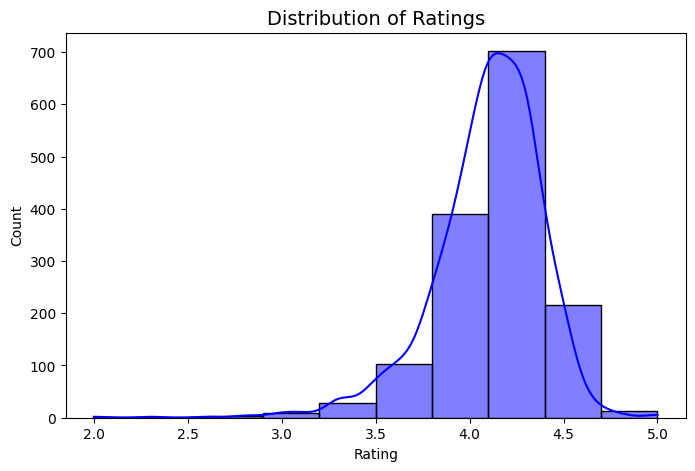

In [150]:
# Plotted a histogram to see the distribution of ratings
plt.figure(figsize=(8, 5))
sns.histplot(df["rating"], bins=10, kde=True, color="blue")
plt.title("Distribution of Ratings", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

OBSERVATION:
- Most of the rating are between 4.0 and 4.5, meaning that products are receiving positive reviews and there's general customer satisfaction
- There are very few low ratings, the products might be that good, or customers who arent satisfied don't leave reviews.
- A thorough rrseach is required to understand why some products receive very low ratings.

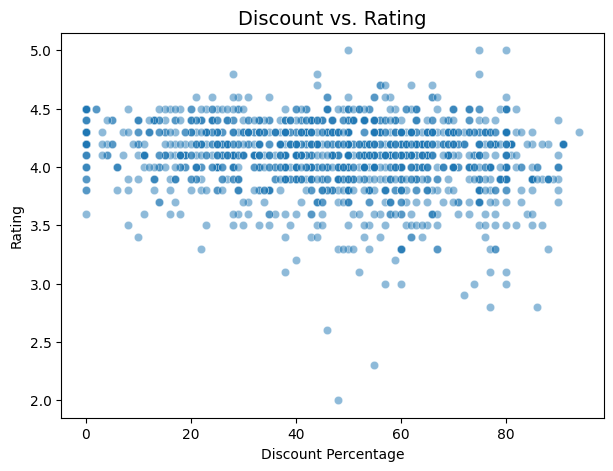

In [151]:
# Plotted a Scatter plot to find the correlation between Discount and Rating
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df["discount_percentage"], y=df["rating"], alpha=0.5)
plt.title("Discount vs. Rating", fontsize=14)
plt.xlabel("Discount Percentage")
plt.ylabel("Rating")
plt.show()

OBSERVATION:
- Each dot represents a product in the dataset.
- The goal was to find the correlation between discount and Ratings.
- According to the Image, theres no clear pattern, some products with high discounts are rated low, while others with low discounts are rated high.
- The dsicount doesnt affect the rating since most products are rated between 4.0 - 4.5
- More reaserch is necessary to understand why some of the low rated products have high discounts.
- Discounts alone DO NOT Improve ratings, the quality of the product and the customer overall satisfaction matter.


/tmp/ipykernel_52973/760841107.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")


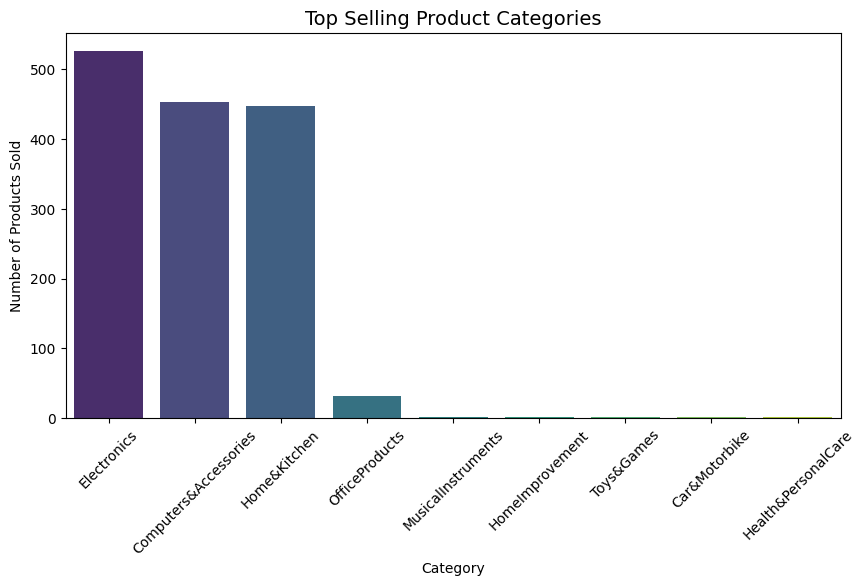

In [152]:
# Plotted a bar plot to see the top selling product categories
plt.figure(figsize=(10, 5))
top_categories = df["category"].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
plt.title("Top Selling Product Categories", fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Number of Products Sold")
plt.show()

OBSERVATION:
- Electronics are the most purchased products, followed by Computer&Accesories, Home kitchen and OfficeProducts.
- Other products barely sell, the why? Is the most Important question
- Do this low selling products still have high discounts?
- Improving the stock of the most purchased products to avoid running out

- What measures can be applied to Increase the purchase of these low selling products?

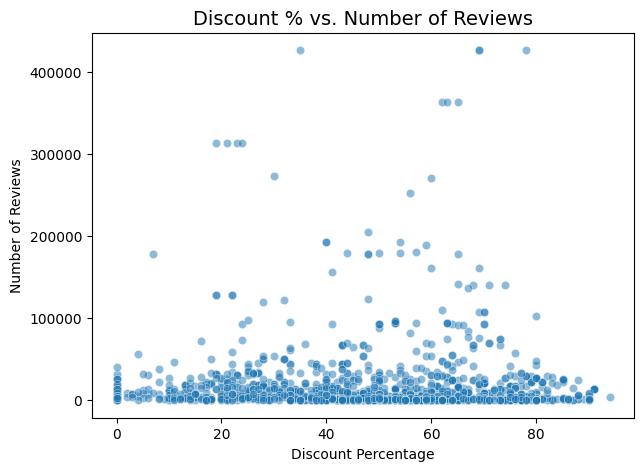

In [155]:
# Plotted a scatter plot to see if products with higher discounts get more reviews.
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df["discount_percentage"], y=df["rating_count"], alpha=0.5)
plt.title("Discount % vs. Number of Reviews", fontsize=14)
plt.xlabel("Discount Percentage")
plt.ylabel("Number of Reviews")
plt.show()

OBSERVATION:
- From the Image we can see that some highly reviewed products have low discounts
- Discount on products does not gurantee more customer interest.
- Does Increasing discounts lead to more reviews/sales or less.
- Products with low discount but high reviews might be popular for another reason other than the price
- Most products have very few reviews regardless of the discounts, maybe customers arent leaving reviews.


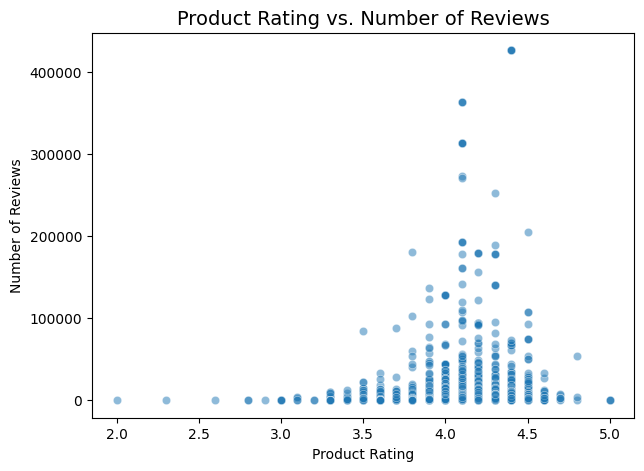

In [156]:
# Plotted a scatter plot to see if products with higher rating have more reviews.
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df["rating"], y=df["rating_count"], alpha=0.5)

plt.title("Product Rating vs. Number of Reviews", fontsize=14)
plt.xlabel("Product Rating")
plt.ylabel("Number of Reviews")
plt.show()

OBSERVATION: 
- Hightly rated products atract more reviewers
- High rated products instills confidence in the customer leading to more purchase and more reviews.
- Most people do not focus on the low rated products

/tmp/ipykernel_52973/3162832590.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated_products["product_name"], y=top_rated_products["rating"], palette="viridis")


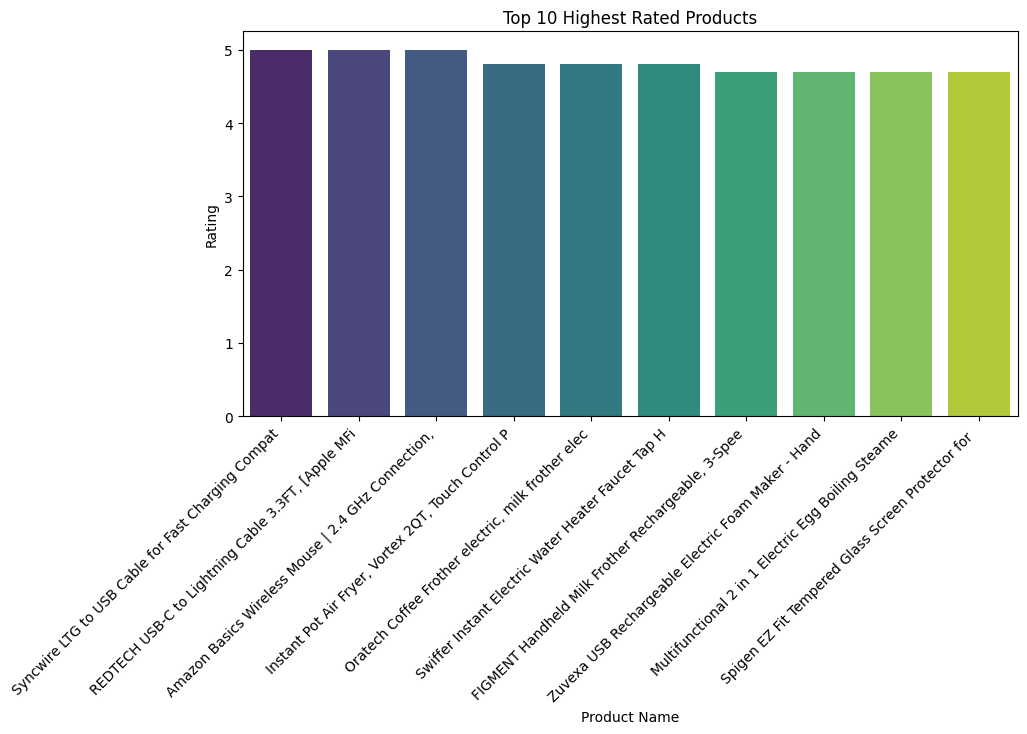

In [157]:
# Plotted a barplot to see the top 10 rated products.
top_rated_products = df.sort_values(by="rating", ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_rated_products["product_name"], y=top_rated_products["rating"], palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Highest Rated Products")
plt.xlabel("Product Name")
plt.ylabel("Rating")
plt.show()

OBSERVATION:
- All the products have ratings close to 5 stars.
- Custmers seem to be really satisfied with these products

PART 4: Insights and Conclusion

- Electronics is the highest rated category, but most of the Items are tech gadjets and home appliances instead of high end products.
- Many products have more than 50% discounts, but does higher discounts really Increase sales?
- Most reviewed products are Tech related
- Most buyers dont leave reviews.
- The category that should be prioritized for discounts is Office Products since they are highly rated but low in volume.
   
Strategies to Improve Sales and Customer Engagement
- Give samll rewards to users who leave genuine feedback with things like loyalty points, gift vouchers, etc;
- Use a customers purchasing hsitory to suggest items for them
- Track whether high discounts lead to high yields in sales or low.

Anomalise Found in the Data
- Some producs sell alot even if they ratings arent that good
-  Other products barely sell.
- Some products with very high discounts barely sell at all.